In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("customer_shopping_data.csv")
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [3]:
df.shape

(99457, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [9]:
df.duplicated().any()

False

In [6]:
df.isnull().any()

invoice_no        False
customer_id       False
gender            False
age               False
category          False
quantity          False
price             False
payment_method    False
invoice_date      False
shopping_mall     False
dtype: bool

# Who shops the most?

In [21]:
gender = df['gender'].value_counts()
gender

Female    59482
Male      39975
Name: gender, dtype: int64

Text(0, 0.5, 'Number of customers')

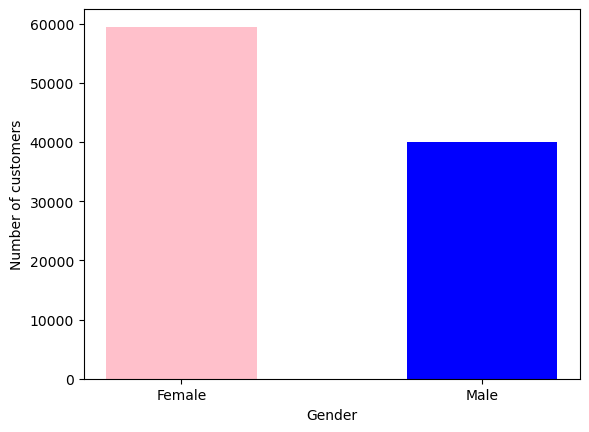

In [20]:
plt.bar(gender.index, gender.values, color=["pink", "blue"], width=0.5)
plt.xlabel("Gender")
plt.ylabel("Number of customers")

# What females and males shops the most?

gender,Female,Male
category,,
Clothing,20652,13835
Cosmetics,9070,6027
Food & Beverage,8804,5972
Toys,6085,4002
Shoes,5967,4067
Souvenir,3017,1982
Technology,2981,2015
Books,2906,2075


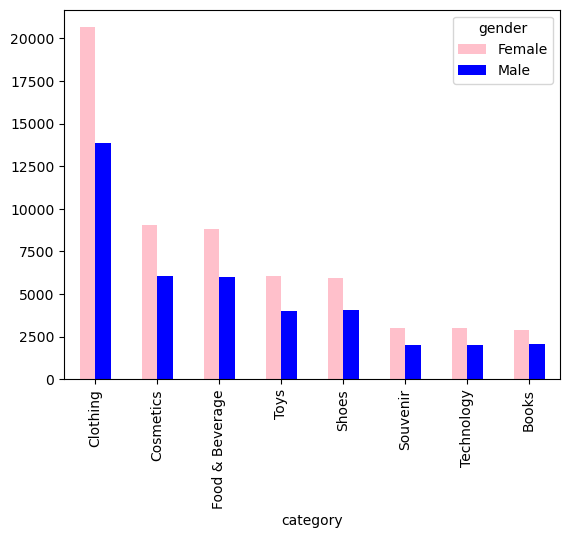

In [21]:
gender_shoping = df.groupby("gender")["category"].value_counts().unstack(level=0)
gender_shoping = gender_shoping.sort_values(by="Female", ascending=False)
gender_shoping.plot(kind="bar",color=["pink","blue"])
gender_shoping